In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_total_all = pd.read_csv('Telkom Purwokerto University.csv')
print(df_total_all)

                            nama  \
0                        m. ltfh   
1    Muhammad Yunus Dani Saputra   
2            MARIO MALIK SAPUTRA   
3                   Rodo Saragih   
4             Ahmad Shofan Shofa   
..                           ...   
516              Arif Sumaryanto   
517              Agung Wicaksono   
518                Agung Prabowo   
519               Adinda Hashina   
520                   Ridho Juan   

                                                review  bintang  
0    Lokasinya masuk lumayan jauh dari jalan utama....        5  
1    Fasilitas di ITTP menurut saya sudah sangat me...        5  
2    Udah test di SMA N 2 Pemalang hasilnya memuask...        5  
3    Kampus hebat bisa melahirkan alumni yg berkual...        5  
4    Institut Teknologi Telkom Purwokerto (ITTP) me...        4  
..                                                 ...      ...  
516                           Toward Telkom University        5  
517                                    

In [2]:
df_total_all_new = df_total_all.dropna(ignore_index=True)
print(df_total_all_new)

                            nama  \
0                        m. ltfh   
1    Muhammad Yunus Dani Saputra   
2            MARIO MALIK SAPUTRA   
3                   Rodo Saragih   
4             Ahmad Shofan Shofa   
..                           ...   
300              Arif Sumaryanto   
301              Agung Wicaksono   
302                Agung Prabowo   
303               Adinda Hashina   
304                   Ridho Juan   

                                                review  bintang  
0    Lokasinya masuk lumayan jauh dari jalan utama....        5  
1    Fasilitas di ITTP menurut saya sudah sangat me...        5  
2    Udah test di SMA N 2 Pemalang hasilnya memuask...        5  
3    Kampus hebat bisa melahirkan alumni yg berkual...        5  
4    Institut Teknologi Telkom Purwokerto (ITTP) me...        4  
..                                                 ...      ...  
300                           Toward Telkom University        5  
301                                    

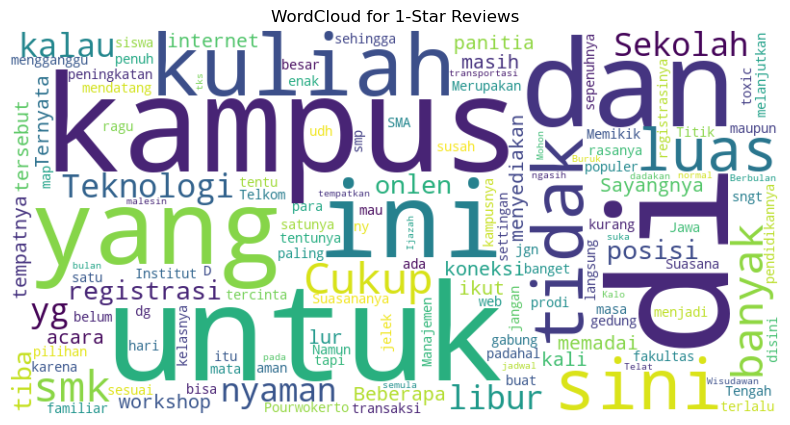

No reviews for 2-star rating.


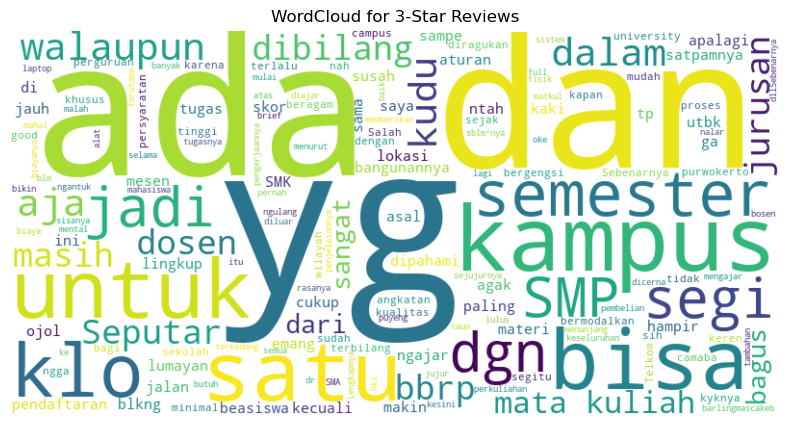

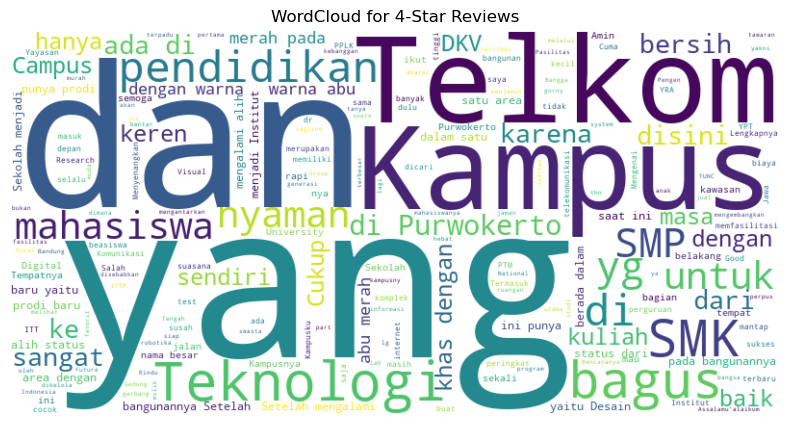

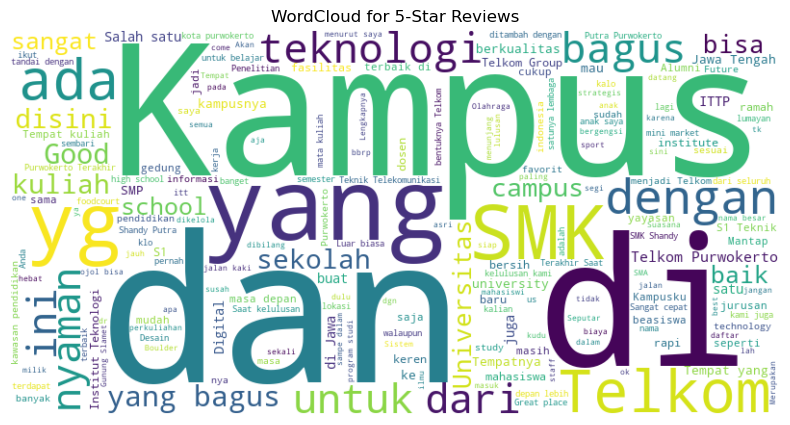

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for bintang in range(1, 6):
    # Filter DataFrame untuk review dengan bintang tertentu
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Gabungkan semua teks dalam satu string
    text = " ".join(review for review in filtered_df.review)
    
    if text:  # Check if there are any reviews for the current star rating
        # Buat wordcloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Tampilkan wordcloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews')
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")

In [4]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
import pandas as pd

translator = GoogleTranslator(source='en', target='id')

def terjemahkan(teks):
    try:
        return translator.translate(teks)
    except Exception as e:
        return str(e)

tqdm.pandas()
df_total_all_new['review'] = df_total_all_new['review'].progress_apply(terjemahkan)

df = df_total_all_new[~df_total_all_new['review'].str.contains("exception", case=False, na=False)]
df = df_total_all_new[~df_total_all_new['review'].str.contains("attribute", case=False, na=False)]

# Tampilkan DataFrame setelah terjemahan
print(df_total_all_new)


100%|██████████| 305/305 [02:47<00:00,  1.83it/s]

                            nama  \
0                        m. ltfh   
1    Muhammad Yunus Dani Saputra   
2            MARIO MALIK SAPUTRA   
3                   Rodo Saragih   
4             Ahmad Shofan Shofa   
..                           ...   
300              Arif Sumaryanto   
301              Agung Wicaksono   
302                Agung Prabowo   
303               Adinda Hashina   
304                   Ridho Juan   

                                                review  bintang  
0    Lokasinya masuk lumayan jauh dari jalan utama....        5  
1    Fasilitas di ITTP menurut saya sudah sangat me...        5  
2    Udah test di SMA N 2 Pemalang hasilnya memuask...        5  
3    Kampus hebat bisa melahirkan alumni yang berku...        5  
4    Institut Teknologi Telkom Purwokerto (ITTP) me...        4  
..                                                 ...      ...  
300                          Menuju Universitas Telkom        5  
301                                    


C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_46852\1466462576.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_all_new['review'] = df_total_all_new['review'].progress_apply(terjemahkan)


In [5]:
# Langkah 1: Bersihkan semua string dan ubah ke huruf kecil
df_total_all_new = df_total_all_new.progress_applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Langkah 2: Buat fungsi untuk menghapus tanda baca
def hapus_tanda_baca(teks):
    if not isinstance(teks, str):
        # Return teks as-is if it's not a string
        return teks
    tanda_baca = ".,!?():"
    for char in tanda_baca:
        teks = teks.replace(char, "")
    return teks

# Langkah 3: Aplikasikan fungsi pada kolom yang diinginkan
df_total_all_new['review'] = df_total_all_new['review'].progress_apply(hapus_tanda_baca)

# Langkah 4: Buat fungsi untuk menghitung jumlah kata
def hitung_jumlah_kata(teks):
    if isinstance(teks, str):
        return len(teks.split())
    return 0  # Return 0 for non-string values

# Terapkan jika diperlukan
df_total_all_new['word_count'] = df_total_all_new['review'].progress_apply(hitung_jumlah_kata)

# Tampilkan DataFrame setelah penghapusan tanda baca dan hitung jumlah kata
print(df_total_all_new.head())


  0%|          | 0/915 [00:00<?, ?it/s]C:\Users\HAFIZ\anaconda3\Lib\site-packages\tqdm\std.py:805: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return getattr(df, df_function)(wrapper, **kwargs)
100%|██████████| 305/305 [00:00<00:00, 305240.45it/s]

                          nama  \
0                      m. ltfh   
1  muhammad yunus dani saputra   
2          mario malik saputra   
3                 rodo saragih   
4           ahmad shofan shofa   

                                              review  bintang  word_count  
0  lokasinya masuk lumayan jauh dari jalan utama ...        5          31  
1  fasilitas di ittp menurut saya sudah sangat me...        5          27  
2  udah test di sma n 2 pemalang hasilnya memuask...        5          36  
3  kampus hebat bisa melahirkan alumni yang berku...        5          12  
4  institut teknologi telkom purwokerto ittp meru...        4          43  


In [6]:
import nltk
from nltk.tokenize import word_tokenize
import string

# Unduh data tokenizer jika belum ada
nltk.download('punkt')


# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Terapkan tokenisasi pada kolom 'text'
df_total_all_new['tokens'] = df_total_all_new['review'].astype(str).apply(tokenize_text)

print(df_total_all_new)

                            nama  \
0                        m. ltfh   
1    muhammad yunus dani saputra   
2            mario malik saputra   
3                   rodo saragih   
4             ahmad shofan shofa   
..                           ...   
300              arif sumaryanto   
301              agung wicaksono   
302                agung prabowo   
303               adinda hashina   
304                   ridho juan   

                                                review  bintang  word_count  \
0    lokasinya masuk lumayan jauh dari jalan utama ...        5          31   
1    fasilitas di ittp menurut saya sudah sangat me...        5          27   
2    udah test di sma n 2 pemalang hasilnya memuask...        5          36   
3    kampus hebat bisa melahirkan alumni yang berku...        5          12   
4    institut teknologi telkom purwokerto ittp meru...        4          43   
..                                                 ...      ...         ...   
300           

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HAFIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
df_total_all_new['tokens'] = df_total_all_new['tokens'].progress_apply(remove_stopwords)

# Tampilkan DataFrame setelah penghapusan stopwords
print(df_total_all_new)

100%|██████████| 305/305 [00:00<00:00, 152347.59it/s]


                            nama  \
0                        m. ltfh   
1    muhammad yunus dani saputra   
2            mario malik saputra   
3                   rodo saragih   
4             ahmad shofan shofa   
..                           ...   
300              arif sumaryanto   
301              agung wicaksono   
302                agung prabowo   
303               adinda hashina   
304                   ridho juan   

                                                review  bintang  word_count  \
0    lokasinya masuk lumayan jauh dari jalan utama ...        5          31   
1    fasilitas di ittp menurut saya sudah sangat me...        5          27   
2    udah test di sma n 2 pemalang hasilnya memuask...        5          36   
3    kampus hebat bisa melahirkan alumni yang berku...        5          12   
4    institut teknologi telkom purwokerto ittp meru...        4          43   
..                                                 ...      ...         ...   
300           

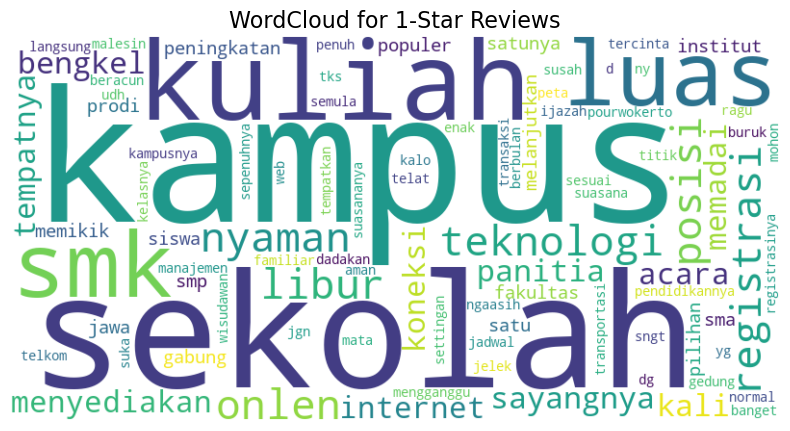

No reviews for 2-star rating.


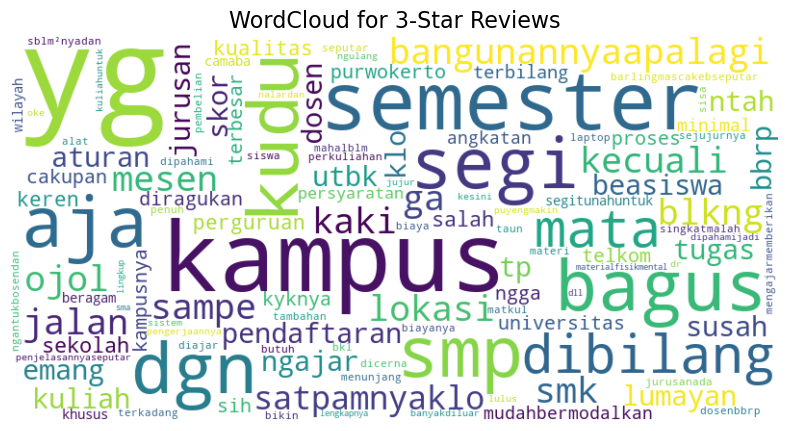

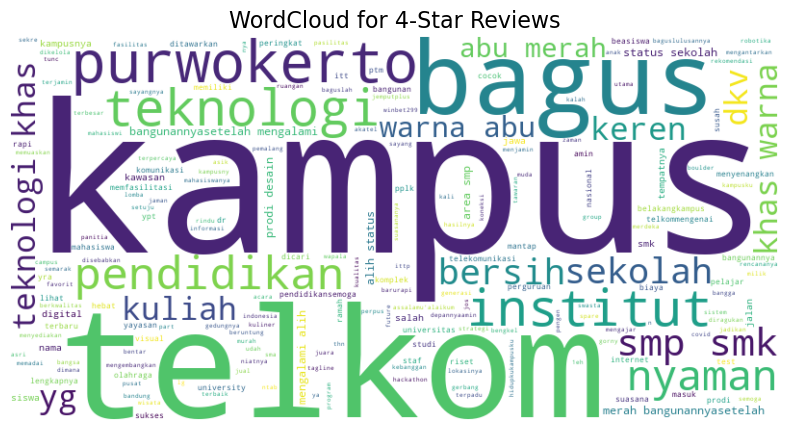

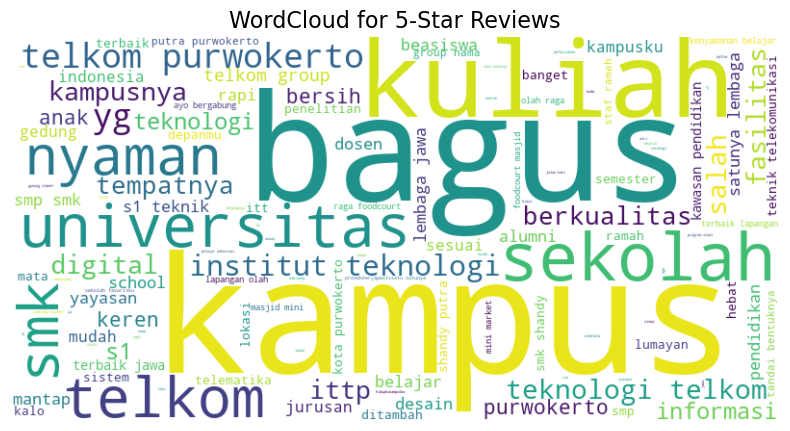

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for bintang in range(1, 6):
    # Filter DataFrame for specific star rating
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Combine all tokenized words into a single string
    text = " ".join(" ".join(tokens) for tokens in filtered_df['tokens'] if isinstance(tokens, list))
    
    if text:  # Check if there are any tokens for the current star rating
        # Generate the WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews', fontsize=16)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")


In [9]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Fungsi untuk melakukan stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
def apply_stemming(tokens):
    return [stemmer_id.stem(token) for token in tokens]

# Terapkan fungsi stemming pada kolom 'tokens'
df_total_all_new['stemmed_tokens'] = df_total_all_new['tokens'].progress_apply(apply_stemming)

print(df_total_all_new)

100%|██████████| 305/305 [00:50<00:00,  6.06it/s]

                            nama  \
0                        m. ltfh   
1    muhammad yunus dani saputra   
2            mario malik saputra   
3                   rodo saragih   
4             ahmad shofan shofa   
..                           ...   
300              arif sumaryanto   
301              agung wicaksono   
302                agung prabowo   
303               adinda hashina   
304                   ridho juan   

                                                review  bintang  word_count  \
0    lokasinya masuk lumayan jauh dari jalan utama ...        5          31   
1    fasilitas di ittp menurut saya sudah sangat me...        5          27   
2    udah test di sma n 2 pemalang hasilnya memuask...        5          36   
3    kampus hebat bisa melahirkan alumni yang berku...        5          12   
4    institut teknologi telkom purwokerto ittp meru...        4          43   
..                                                 ...      ...         ...   
300           

In [10]:
import pandas as pd
import re


# Fungsi untuk menghapus angka
def remove_numbers(token_list):
    return [token for token in token_list if not re.search(r'\d', token)]  # Hapus token yang mengandung angka

# Terapkan fungsi ke setiap baris
df_total_all_new['stemmed_tokens2'] = df_total_all_new['stemmed_tokens'].apply(remove_numbers)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens2']:
    print(','.join(tokens))


lokasi,masuk,lumayan,jalan,utama,masuk,lewat,smp,smk,duluojol,masuk,sampe,sinu,nemu,kantin,sih,kantin,kompleks,smk,deh,kayak
fasilitas,ittp,tunjang,aspek,kuliah,tambah,program,studi,bebas,pilih,bidang,sesuai
udah,test,sma,n,malang,hasil,muas,peringkat,test,sayang,kalah,peringkat,kuliah,niat,ngambil,jurus,ilmu,telekomunikasi
kampus,hebat,lahir,alumni,kualitas,sesuai,mampu,bidang,
institut,teknologi,telkom,purwokerto,ittp,guru,swasta,milik,telkom,group,kelola,yayasan,didik,telkom,ypt,tagline,utama,digital,campus,for,digital,future,program,studi,antar,generasi,muda,indonesia,gerbang,digital
bagus,biaya,kuliah,murah,tawar,beasiswa,nya,,jadi,nama,kampus,sebab,mahasiswa,mahasiswa,hebat,nama,kampus,
acara,edufest,hompimpaa,tempat,nyaman,parkir,rapi,atur
suasana,kampus,nyaman,asri,intitut,teknologi,milik,yayasan,telkom,isi,jurus,teknik,telekomunikasi,teknik,telekomunikasi,teknik,informatika,sistem,informasi,desain,komusikasi,visual,teknik,elektro,software,enginer,beasiswa,neko,
kampus,bagus,se

In [11]:
# Menghitung token kosong setelah stemming
def count_empty_tokens(df):
    # Hitung jumlah token kosong dalam setiap baris dan jumlah totalnya
    df['empty_token_count'] = df['stemmed_tokens'].apply(lambda tokens: sum(1 for token in tokens if not token.strip()))
    total_empty_tokens = df['empty_token_count'].sum()
    print(f"Total Token Kosong: {total_empty_tokens}")
    return total_empty_tokens

# Panggil fungsi untuk menghitung token kosong
count_empty_tokens(df_total_all_new)


Total Token Kosong: 38


38

In [12]:
# Bersihkan token kosong langsung dari kolom 'stemmed_tokens'
df_total_all_new['stemmed_tokens'] = df_total_all_new['stemmed_tokens'].apply(
    lambda tokens: [token for token in tokens if token.strip()]
)

# Konfirmasi token kosong sudah dihapus
count_empty_tokens(df_total_all_new)


Total Token Kosong: 0


0

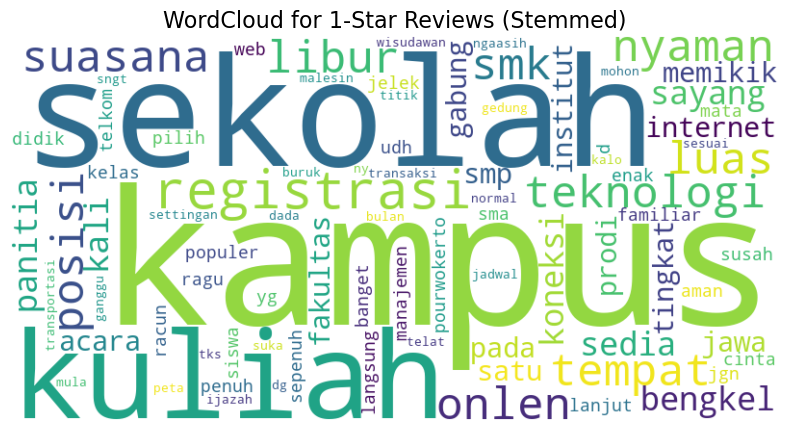

No reviews for 2-star rating.


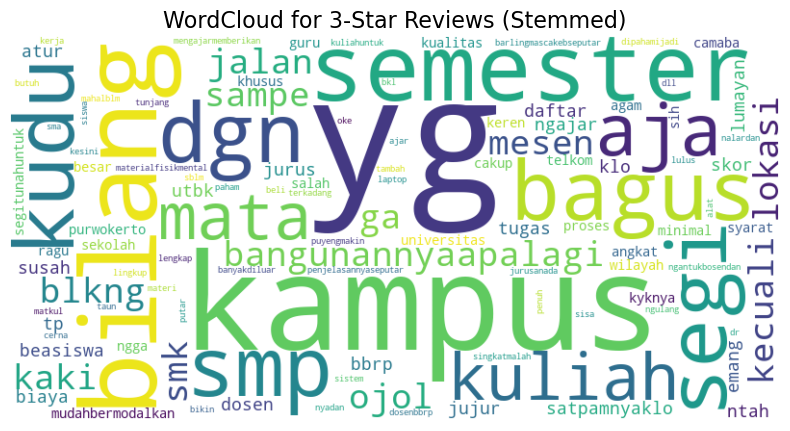

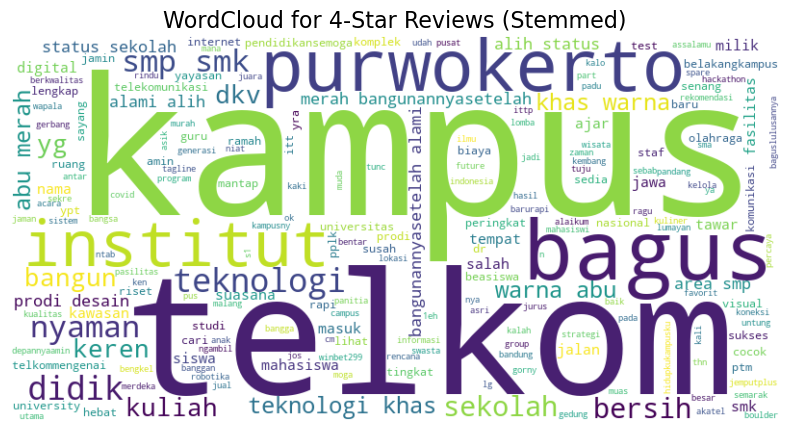

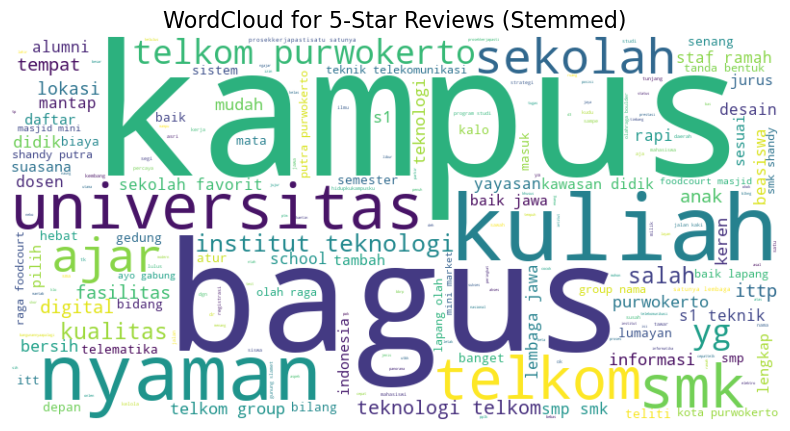

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for bintang in range(1, 6):
    # Filter DataFrame for specific star rating
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Combine all stemmed tokens into a single string
    text = " ".join(" ".join(tokens) for tokens in filtered_df['stemmed_tokens'] if isinstance(tokens, list))
    
    if text:  # Check if there are any tokens for the current star rating
        # Generate the WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
        
        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews (Stemmed)', fontsize=16)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")


In [14]:
import pandas as pd
import ast  # Untuk mengubah string menjadi list

# Membaca kembali file Excel
df_total_all_new = pd.read_excel("ITTP_Cleaned.xlsx")

# Konversi kembali kolom 'stemmed_tokens2' dari string ke list tokenized
df_total_all_new['stemmed_tokens2'] = df_total_all_new['stemmed_tokens2'].apply(ast.literal_eval)

# Cek apakah sudah berbentuk list
print(type(df_total_all_new['stemmed_tokens2'][0]))  # Harusnya <class 'list'>



<class 'list'>


In [15]:
import pandas as pd
import requests
import tqdm
import io

# 1. **Ambil dan Muat Kamus Alay**
url_kamus_alay = "https://raw.githubusercontent.com/nadyndyaa/Kamus-Alay/refs/heads/main/Kamus%20Alay.csv"
response = requests.get(url_kamus_alay)

# Simpan ke DataFrame
kamus_alay = pd.read_csv(io.StringIO(response.text), encoding='latin-1')

# Ubah ke Dictionary {alay: baik}
kamus_alay_dict = dict(zip(kamus_alay['Alay'], kamus_alay['Baik']))

# 2. **Fungsi Normalisasi**
def normalisasi_kata(token_list):
    """Ganti kata yang ada di kamus alay dengan kata normal"""
    if isinstance(token_list, list):  # Pastikan input berbentuk list
        return [kamus_alay_dict.get(word, word) for word in token_list]  # Cek di kamus, jika tidak ada tetap pakai kata asli
    return token_list  # Jika bukan list, kembalikan seperti semula

# 3. **Terapkan ke DataFrame**
tqdm.tqdm.pandas()
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens2'].progress_apply(normalisasi_kata)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))



100%|██████████| 305/305 [00:00<00:00, 151967.54it/s]

lokasi,masuk,lumayan,jalan,utama,masuk,lewat,smp,smk,dulu,ojol,masuk,sampe,sinu,nemu,kantin,sih,kantin,kompleks,smk,deh,kayak
fasilitas,ittp,tunjang,aspek,kuliah,tambah,program,studi,bebas,pilih,bidang,sesuai
udah,test,sma,malang,hasil,muas,peringkat,test,sayang,kalah,peringkat,kuliah,niat,ngambil,jurus,ilmu,telekomunikasi
kampus,hebat,lahir,alumni,kualitas,sesuai,mampu,bidang,
institut,teknologi,telkom,purwokerto,ittp,guru,swasta,milik,telkom,group,kelola,yayasan,didik,telkom,ypt,tagline,utama,digital,campus,for,digital,future,program,studi,antar,generasi,muda,indonesia,gerbang,digital
bagus,biaya,kuliah,murah,tawar,beasiswa,,jadi,nama,kampus,sebab,mahasiswa,mahasiswa,hebat,nama,kampus,
acara,edufest,hompimpa,tempat,nyaman,parkir,rapi,atur
suasana,kampus,nyaman,asri,intitut,teknologi,milik,yayasan,telkom,isi,jurus,teknik,telekomunikasi,teknik,telekomunikasi,teknik,informatika,sistem,informasi,desain,komusikasi,visual,teknik,elektro,software,enginer,beasiswa,neko,
kampus,bagus,segi,ban

In [16]:
import pandas as pd
import requests
import tqdm
import io

# 1. **Ambil dan Muat Kamus Alay**
url_kamus_alay = "https://raw.githubusercontent.com/Aiji3107/kamus_alay/refs/heads/main/kamus_alay.csv"
response = requests.get(url_kamus_alay)

# Simpan ke DataFrame
kamus_alay = pd.read_csv(io.StringIO(response.text), encoding='latin-1')

# Ubah ke Dictionary {alay: baik}
kamus_alay_dict = dict(zip(kamus_alay['slang'], kamus_alay['formal']))

# 2. **Fungsi Normalisasi**
def normalisasi_kata(token_list):
    """Ganti kata yang ada di kamus alay dengan kata normal"""
    if isinstance(token_list, list):  # Pastikan input berbentuk list
        return [kamus_alay_dict.get(word, word) for word in token_list]  # Cek di kamus, jika tidak ada tetap pakai kata asli
    return token_list  # Jika bukan list, kembalikan seperti semula

# 3. **Terapkan ke DataFrame**
tqdm.tqdm.pandas()
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(normalisasi_kata)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 305/305 [00:00<00:00, 152492.87it/s]

lokasi,masuk,lumayan,jalan,utama,masuk,lewat,sampai,smk,dulu,ojol,masuk,sampai,sinu,nemu,kantin,sih,kantin,kompleks,smk,deh,kayak
fasilitas,ittp,tunjang,aspek,kuliah,tambah,program,studi,bebas,pilih,bidang,sesuai
sudah,test,sama,malang,hasil,muas,peringkat,test,sayang,kalah,peringkat,kuliah,niat,ngambil,jurus,ilmu,telekomunikasi
kampus,hebat,lahir,alumni,kualitas,sesuai,mampu,bidang,
institut,teknologi,telkom,purwokerto,ittp,guru,swasta,milik,telkom,group,kelola,yayasan,didik,telkom,ypt,tagline,utama,digital,campus,for,digital,future,program,studi,antar,generasi,muda,indonesia,gerbang,digital
bagus,biaya,kuliah,murah,tawar,beasiswa,,jadi,nama,kampus,sebab,mahasiswa,mahasiswa,hebat,nama,kampus,
acara,edufest,hompimpa,tempat,nyaman,parkir,rapi,atur
suasana,kampus,nyaman,asri,intitut,teknologi,milik,yayasan,telkom,isi,jurus,teknik,telekomunikasi,teknik,telekomunikasi,teknik,informatika,sistem,informasi,desain,komusikasi,visual,teknik,elektro,software,enginer,beasiswa,neko,
kampus,bagus,se

In [17]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(remove_stopwords)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Fungsi untuk melakukan stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
def apply_stemming(tokens):
    return [stemmer_id.stem(token) for token in tokens]

# Terapkan fungsi stemming pada kolom 'tokens'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(apply_stemming)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 305/305 [00:00<00:00, 120254.06it/s]


lokasi,masuk,lumayan,jalan,utama,masuk,smk,ojol,masuk,sinu,nemu,kantin,sih,kantin,kompleks,smk,deh,kayak
fasilitas,ittp,tunjang,aspek,kuliah,program,studi,bebas,pilih,bidang,sesuai
test,malang,hasil,muas,peringkat,test,sayang,kalah,peringkat,kuliah,niat,ngambil,jurus,ilmu,telekomunikasi
kampus,hebat,lahir,alumni,kualitas,sesuai,bidang,
institut,teknologi,telkom,purwokerto,ittp,guru,swasta,milik,telkom,group,kelola,yayasan,didik,telkom,ypt,tagline,utama,digital,campus,for,digital,future,program,studi,generasi,muda,indonesia,gerbang,digital
bagus,biaya,kuliah,murah,tawar,beasiswa,,nama,kampus,mahasiswa,mahasiswa,hebat,nama,kampus,
acara,edufest,hompimpa,nyaman,parkir,rapi,atur
suasana,kampus,nyaman,asri,intitut,teknologi,milik,yayasan,telkom,isi,jurus,teknik,telekomunikasi,teknik,telekomunikasi,teknik,informatika,sistem,informasi,desain,komusikasi,visual,teknik,elektro,software,enginer,beasiswa,neko,
kampus,bagus,segi,bangunan,cakup,smk,lokasi,kampus,kudu,jalan,kaki,kecuali,mesen,ojol,sa

100%|██████████| 305/305 [00:25<00:00, 12.09it/s]

lokasi,masuk,lumayan,jalan,utama,masuk,smk,ojol,masuk,sinu,nemu,kantin,sih,kantin,kompleks,smk,deh,kayak
fasilitas,ittp,tunjang,aspek,kuliah,program,studi,bebas,pilih,bidang,sesuai
test,malang,hasil,muas,peringkat,test,sayang,kalah,peringkat,kuliah,niat,ngambil,jurus,ilmu,telekomunikasi
kampus,hebat,lahir,alumni,kualitas,sesuai,bidang,
institut,teknologi,telkom,purwokerto,ittp,guru,swasta,milik,telkom,group,kelola,yayasan,didik,telkom,ypt,tagline,utama,digital,campus,for,digital,future,program,studi,generasi,muda,indonesia,gerbang,digital
bagus,biaya,kuliah,murah,tawar,beasiswa,,nama,kampus,mahasiswa,mahasiswa,hebat,nama,kampus,
acara,edufest,hompimpa,nyaman,parkir,rapi,atur
suasana,kampus,nyaman,asri,intitut,teknologi,milik,yayasan,telkom,isi,jurus,teknik,telekomunikasi,teknik,telekomunikasi,teknik,informatika,sistem,informasi,desain,komusikasi,visual,teknik,elektro,software,enginer,beasiswa,neko,
kampus,bagus,segi,bangun,cakup,smk,lokasi,kampus,kudu,jalan,kaki,kecuali,mesen,ojol,satp

In [18]:
# Menghitung token kosong setelah stemming
def count_empty_tokens(df):
    # Hitung jumlah token kosong dalam setiap baris dan jumlah totalnya
    df['empty_token_count'] = df['stemmed_tokens4'].apply(lambda tokens: sum(1 for token in tokens if not token.strip()))
    total_empty_tokens = df['empty_token_count'].sum()
    print(f"Total Token Kosong: {total_empty_tokens}")
    return total_empty_tokens

# Panggil fungsi untuk menghitung token kosong
count_empty_tokens(df_total_all_new)


# Bersihkan token kosong langsung dari kolom 'stemmed_tokens'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda tokens: [token for token in tokens if token.strip()]
)

# Konfirmasi token kosong sudah dihapus
count_empty_tokens(df_total_all_new)


Total Token Kosong: 38
Total Token Kosong: 0


0

In [19]:
import ast
import pandas as pd

# Kata-kata yang ingin dihapus
stopwords = {'none', 'nya', 'moga', 'oke', 'ya', 'isi', 'ok', 'jos', 'gaes', 'via','nih'}

# Fungsi untuk menghitung jumlah token kosong atau yang termasuk stopwords
def count_empty_tokens(df):
    empty_tokens = df['stemmed_tokens4'].apply(lambda tokens: sum(1 for token in tokens if not token.strip() or token.lower() in stopwords))
    total_empty_tokens = empty_tokens.sum()
    print(f"Total empty or stopword tokens: {total_empty_tokens}")

# Pastikan kolom 'stemmed_tokens4' berisi list, bukan string yang terlihat seperti list
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Bersihkan token kosong dan kata-kata yang ada dalam stopwords
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda tokens: [token for token in tokens if token.strip() and token.lower() not in stopwords]
)

# Konfirmasi bahwa token yang tidak diinginkan sudah dihapus
count_empty_tokens(df_total_all_new)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


Total empty or stopword tokens: 0
lokasi,masuk,lumayan,jalan,utama,masuk,smk,ojol,masuk,sinu,nemu,kantin,sih,kantin,kompleks,smk,deh,kayak
fasilitas,ittp,tunjang,aspek,kuliah,program,studi,bebas,pilih,bidang,sesuai
test,malang,hasil,muas,peringkat,test,sayang,kalah,peringkat,kuliah,niat,ngambil,jurus,ilmu,telekomunikasi
kampus,hebat,lahir,alumni,kualitas,sesuai,bidang
institut,teknologi,telkom,purwokerto,ittp,guru,swasta,milik,telkom,group,kelola,yayasan,didik,telkom,ypt,tagline,utama,digital,campus,for,digital,future,program,studi,generasi,muda,indonesia,gerbang,digital
bagus,biaya,kuliah,murah,tawar,beasiswa,nama,kampus,mahasiswa,mahasiswa,hebat,nama,kampus
acara,edufest,hompimpa,nyaman,parkir,rapi,atur
suasana,kampus,nyaman,asri,intitut,teknologi,milik,yayasan,telkom,jurus,teknik,telekomunikasi,teknik,telekomunikasi,teknik,informatika,sistem,informasi,desain,komusikasi,visual,teknik,elektro,software,enginer,beasiswa,neko
kampus,bagus,segi,bangun,cakup,smk,lokasi,kampus,kudu,jalan,ka

In [20]:
import gensim
from gensim import corpora

# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'].progress_apply(lambda x: x))
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Tampilkan topik-topik
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

100%|██████████| 305/305 [00:00<00:00, 201300.19it/s]


Topic: 0 
Words: 0.039*"kampus" + 0.039*"bersih" + 0.026*"rapi" + 0.026*"smk" + 0.020*"bagus" + 0.020*"gabung" + 0.017*"masuk" + 0.014*"keren" + 0.014*"sekolah" + 0.013*"peringkat"
Topic: 1 
Words: 0.031*"kuliah" + 0.030*"kampus" + 0.019*"telkom" + 0.019*"kerja" + 0.015*"ajar" + 0.015*"dosen" + 0.015*"bilang" + 0.015*"semester" + 0.015*"teknologi" + 0.012*"didik"
Topic: 2 
Words: 0.086*"kampus" + 0.039*"telkom" + 0.033*"kuliah" + 0.032*"smk" + 0.032*"purwokerto" + 0.028*"sekolah" + 0.024*"mantap" + 0.016*"salah" + 0.016*"nama" + 0.016*"teknologi"
Topic: 3 
Words: 0.073*"bagus" + 0.054*"kampus" + 0.054*"telkom" + 0.042*"universitas" + 0.035*"teknologi" + 0.027*"institut" + 0.023*"purwokerto" + 0.016*"jawa" + 0.016*"didik" + 0.016*"bangun"
Topic: 4 
Words: 0.057*"nyaman" + 0.034*"sekolah" + 0.031*"kampus" + 0.029*"bagus" + 0.029*"ajar" + 0.024*"anak" + 0.020*"teknologi" + 0.019*"fasilitas" + 0.019*"teknik" + 0.019*"didik"


In [21]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from tqdm import tqdm
import pandas as pd

def compute_coherence_values(dictionary, corpus, texts, topic_range, passes_range):
    results = []
    best_coherence = 0
    best_model = None
    best_params = {}
    
    for num_topics in tqdm(topic_range, desc="Computing coherence for topics"):
        for passes in tqdm(passes_range, desc=f"Testing {num_topics} topics", leave=False):
            # Membuat model LDA dengan jumlah topik dan passes yang berbeda
            lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes, random_state=100)
            
            # Menghitung nilai koherensi
            coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_score = coherence_model.get_coherence()
            
            # Simpan hasil
            results.append({'num_topics': num_topics, 'passes': passes, 'coherence': coherence_score})
            
            # Cek apakah nilai koherensi saat ini adalah yang terbaik
            if coherence_score > best_coherence:
                best_coherence = coherence_score
                best_model = lda_model
                best_params = {'num_topics': num_topics, 'passes': passes}
    
    # Konversi hasil ke DataFrame untuk analisis lebih lanjut
    results_df = pd.DataFrame(results)
    
    print(f"\n✅ Nilai koherensi optimal: {best_coherence:.4f}")
    print(f"📊 Parameter terbaik: {best_params}")

    return results_df, best_model, best_params

# 🔥 Jalankan fungsi dengan rentang topik dan passes yang diinginkan
topic_range = range(1, 11)  # Dari 1 hingga 10 topik
passes_range = range(15, 91, 15)  # Dari 15 hingga 90 dengan kelipatan 15

results_df, best_lda_model, best_params = compute_coherence_values(dictionary=dictionary, 
                                                                   corpus=corpus, 
                                                                   texts=df_total_all_new['stemmed_tokens4'], 
                                                                   topic_range=topic_range, 
                                                                   passes_range=passes_range)


Computing coherence for topics: 100%|██████████| 10/10 [21:39<00:00, 129.97s/it]


✅ Nilai koherensi optimal: 0.4786
📊 Parameter terbaik: {'num_topics': 8, 'passes': 75}


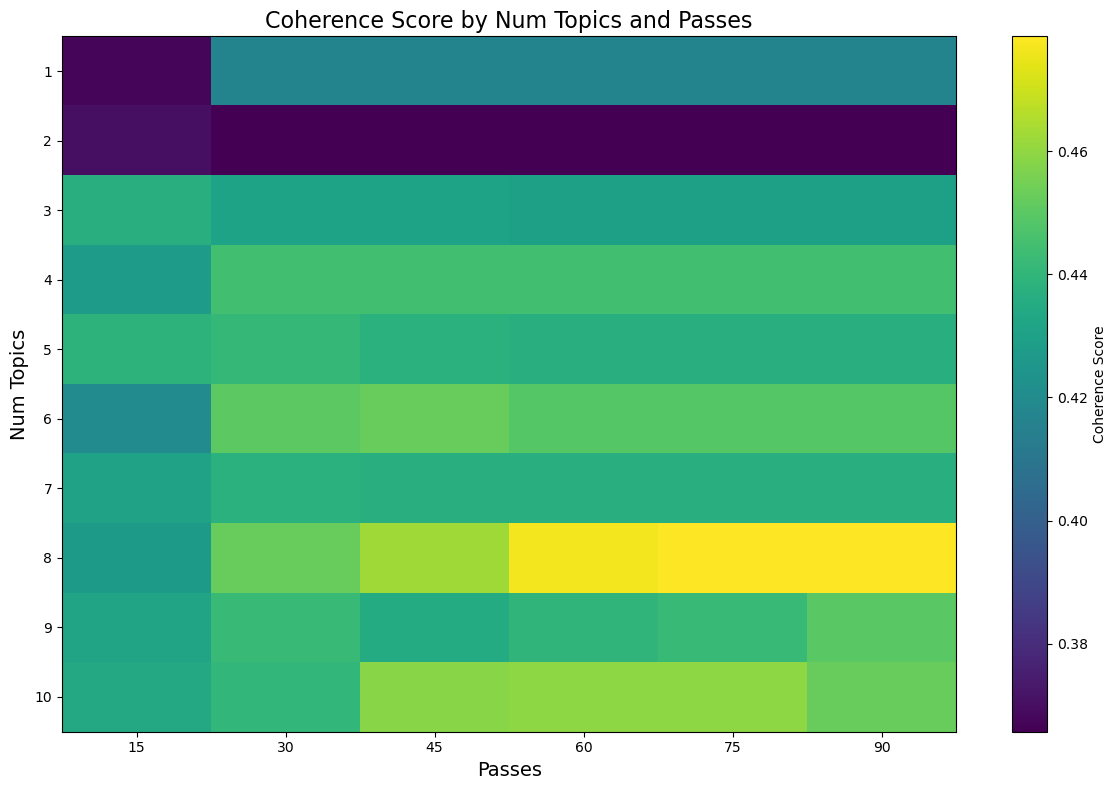

In [22]:
import matplotlib.pyplot as plt

# Visualisasi nilai koherensi dengan sumbu x dan y yang sesuai
pivot_table = results_df.pivot(index='num_topics', columns='passes', values='coherence')

# Membuat heatmap dengan label yang sesuai
plt.figure(figsize=(12, 8))
plt.title("Coherence Score by Num Topics and Passes", fontsize=16)
plt.xlabel("Passes", fontsize=14)
plt.ylabel("Num Topics", fontsize=14)

# Menentukan label sumbu x dan y dengan nilai yang sesuai
plt.xticks(ticks=range(len(pivot_table.columns)), labels=pivot_table.columns)
plt.yticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index)

# Menampilkan heatmap
plt.imshow(pivot_table, cmap='viridis', aspect='auto')
plt.colorbar(label='Coherence Score')
plt.tight_layout()
plt.show()


In [26]:
import gensim
from gensim import corpora

# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'].progress_apply(lambda x: x))
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=8, id2word=dictionary, passes=75)

# Tampilkan topik-topik
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

100%|██████████| 305/305 [00:00<00:00, 48239.48it/s]


Topic: 0 
Words: 0.052*"mantap" + 0.039*"kampus" + 0.035*"bersih" + 0.034*"rapi" + 0.026*"sekolah" + 0.026*"jawa" + 0.026*"favorit" + 0.026*"mudah" + 0.026*"kerja" + 0.026*"lembaga"
Topic: 1 
Words: 0.070*"universitas" + 0.051*"kampus" + 0.051*"kuliah" + 0.049*"purwokerto" + 0.049*"telkom" + 0.026*"salah" + 0.023*"teknologi" + 0.019*"registrasi" + 0.019*"keren" + 0.019*"jawa"
Topic: 2 
Words: 0.184*"bagus" + 0.129*"kampus" + 0.031*"teknologi" + 0.029*"teknik" + 0.022*"nyaman" + 0.022*"informasi" + 0.022*"desain" + 0.015*"suasana" + 0.015*"telekomunikasi" + 0.015*"gabung"
Topic: 3 
Words: 0.074*"telkom" + 0.061*"kampus" + 0.052*"sekolah" + 0.033*"institut" + 0.031*"teknologi" + 0.029*"digital" + 0.024*"purwokerto" + 0.023*"bangun" + 0.023*"prodi" + 0.019*"smk"
Topic: 4 
Words: 0.081*"smk" + 0.068*"telkom" + 0.034*"purwokerto" + 0.027*"kawasan" + 0.022*"didik" + 0.021*"group" + 0.021*"school" + 0.021*"alumni" + 0.017*"masuk" + 0.014*"kalo"
Topic: 5 
Words: 0.058*"nyaman" + 0.047*"teknolo

In [29]:
import os
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel

# Pastikan semua elemen dalam kolom 'stemmed_tokens4' adalah list
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(lambda x: x if isinstance(x, list) else [])

# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = LdaModel(corpus, num_topics=8, id2word=dictionary, passes=75)

# Mengambil topik-topik dan menyimpannya dalam format yang dapat diekspor
topics = []
for idx, topic in lda_model.print_topics(-1):
    words = topic.split(' + ')
    topic_dict = {'Topic': idx}
    for i, word in enumerate(words):
        weight, term = word.split('*"')
        term = term.replace('"', '')
        topic_dict[f'Word_{i+1}'] = f'{term} ({weight})'
    topics.append(topic_dict)

# Konversi ke DataFrame
df_topics = pd.DataFrame(topics)

# Simpan ke file Excel dengan sheet baru
file_path = 'Seluruh_Univ_lda_topics2.xlsx'
sheet_name = 'ITTP_Univ_lda_topics'  # Nama sheet baru yang diinginkan

# Cek apakah file sudah ada
file_exists = os.path.exists(file_path)

if file_exists:
    # Jika file sudah ada, gunakan mode append dengan if_sheet_exists="replace"
    with pd.ExcelWriter(file_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
        df_topics.to_excel(writer, sheet_name=sheet_name, index=False)
else:
    # Jika file belum ada, buat file baru tanpa if_sheet_exists
    with pd.ExcelWriter(file_path, mode="w", engine="openpyxl") as writer:
        df_topics.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Topik telah disimpan dalam sheet '{sheet_name}' pada file '{file_path}'")


Topik telah disimpan dalam sheet 'ITTP_Univ_lda_topics' pada file 'Seluruh_Univ_lda_topics2.xlsx'
